# A. Checking Linear Regression Assumptions


This is the first page of an extended lesson that is broken into parts A, B, C, and D.  Make sure you complete each part before moving to the next!

Ultimately, we are going to run a linear regression to predict the price of a house in a housing data set.

## Lesson Objectives:

By the end of this lesson, students will be able to:

Check for linear relationships between features and the target.
Check the assumption of normality with a Q-Q plot.

In [1]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/3900563112.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-talk'])


In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTiitWN7DnJMRDcRvMKL3_xu5Y0fl2u5J2vWOrJOcOy95ZiBulg5HqMftWWeiYFYYNHMuVPDWT_vxVc/pub?output=csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5000 non-null   int64  
 1   bedrooms       5000 non-null   int64  
 2   bathrooms      5000 non-null   float64
 3   sqft_living    5000 non-null   int64  
 4   sqft_lot       5000 non-null   int64  
 5   floors         5000 non-null   float64
 6   waterfront     5000 non-null   int64  
 7   sqft_above     5000 non-null   int64  
 8   sqft_basement  5000 non-null   int64  
 9   yr_built       5000 non-null   int64  
 10  yr_renovated   5000 non-null   int64  
 11  zipcode        5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1100000,2,1.75,2050,11900,1.0,0,2050,0,1950,0,98004
1,430000,3,1.50,1690,9708,1.5,0,1690,0,1954,0,98006
2,2150000,3,2.75,3470,9610,3.0,1,3470,0,1989,2000,98034
3,336000,4,2.50,2530,8169,2.0,0,2530,0,1993,0,98003
4,649500,3,3.00,3730,383328,1.5,0,2230,1500,1990,0,98038


In [4]:
## Zipcode is really a categorical feature -so converting to string
df['zipcode'] = df['zipcode'].astype(str)

In [5]:
## check for null values 
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

##Checking the Assumptions of Linear Regression

As a reminder, 2 of the assumptions of linear regression are about the features themselves, which we check for BEFORE we make our model:

     1. Independence of features / little-to-no multicollinearity.

     2. Assumption of Linearity/Linear Relationship of features to the target.

The remaining 2 assumptions are about the model's residuals and therefore can only be checked AFTER we make our model. 

    3. Assumption of Normality/Normally Distributed Residuals 

    4. Assumption of homoscedasticity - or equal variance across residuals.

We will check the first two in this lesson.  We will check the remaining two after we run the model.

## 1. Checking for the Assumption of Linearity
The easiest way to identify linear relationships between our features and the target is to visualize them!

If use use Seaborn's pairplot, we can specify y_vars = 'price' to only plot the comparisons with price as the y-axis.

In [6]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

10

Since 10 columns of pairplots will be a bit much to look at, we can save a list of our numeric features and then produce multiple pair plots, using only a few features at a time.

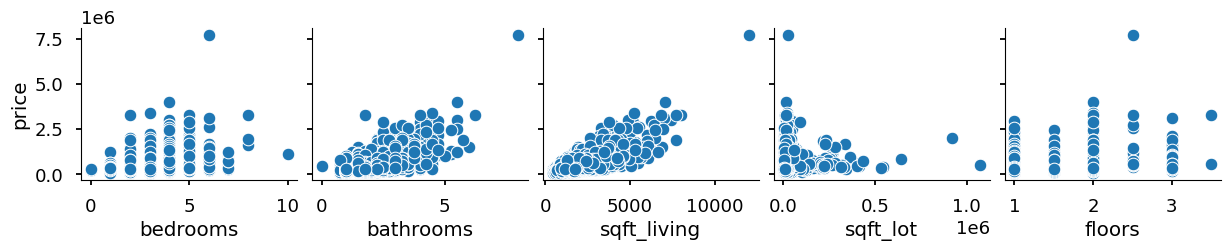

In [7]:
sns.pairplot(df, y_vars='price',x_vars=cols[:5]);

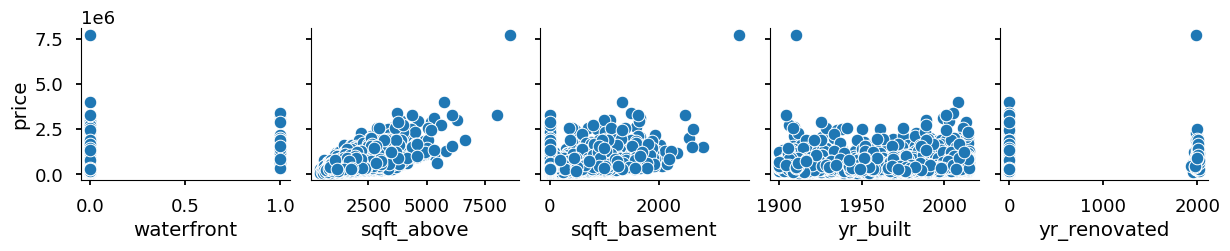

In [8]:
sns.pairplot(df, y_vars='price',x_vars=cols[5:]);

## Making it Easier to See Linearity
It can sometimes be difficult to tell if there is a linear relationship when there are many markers in the same region of the graph. Some good examples are the "sqft_basement" and "yr_built" columns above.

To make it easier to assess the relationship, we can specify kind='reg' in sns.pairplot. It will add a regression line of best fit to the visual for each feature.

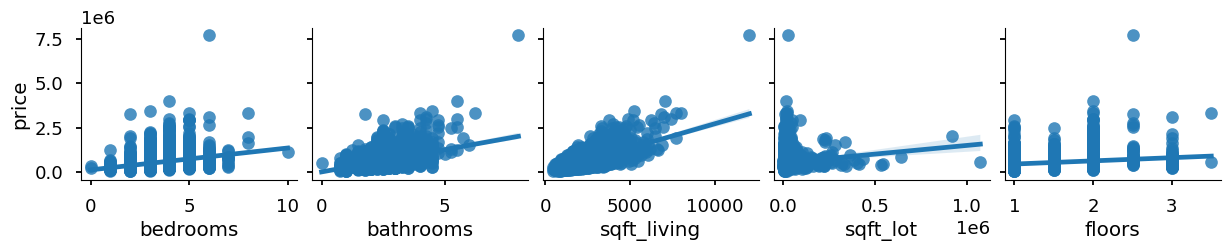

In [9]:
sns.pairplot(df, y_vars='price',x_vars=cols[:5],kind='reg');

Unfortunately, the default color for the regression line is the same as the markers. In addition, the markers lost their white background which made it easier to see overlapping markers.

We can fix both of these issues but we will need to understand how pairplot is producing the visuals to do so.

Know that you can figure this out by reading the documentation for sns.pairplot and the sns.regplot that it is using.

Here is the additional argument that we want to add to sns.pairplot:

In [10]:
plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
             scatter_kws={'edgecolor':'white','lw':1})

This plot_kws argument will:
Make our trendline red and dashed.
Add a white edge to the scatter plot markers and will make sure they have linewidth that is visible.

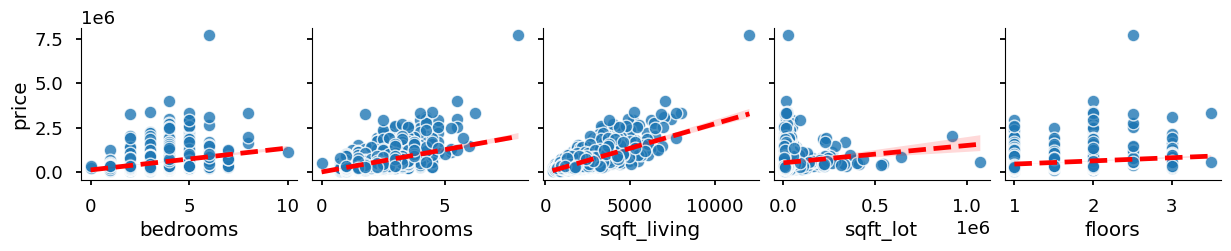

In [11]:
## Making a pairplot with regression lines
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

## Final Plots for Linearity


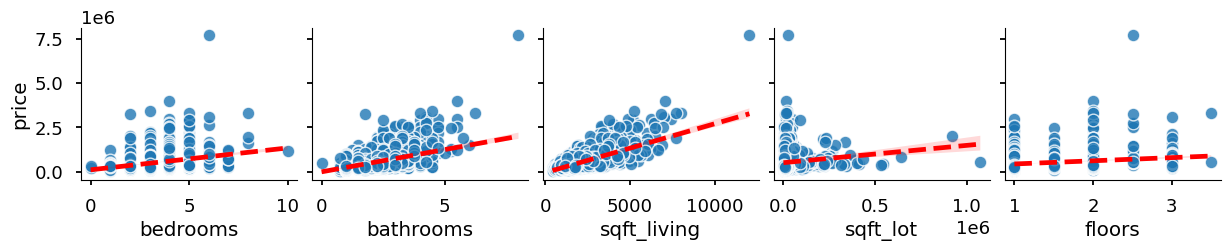

In [12]:
## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

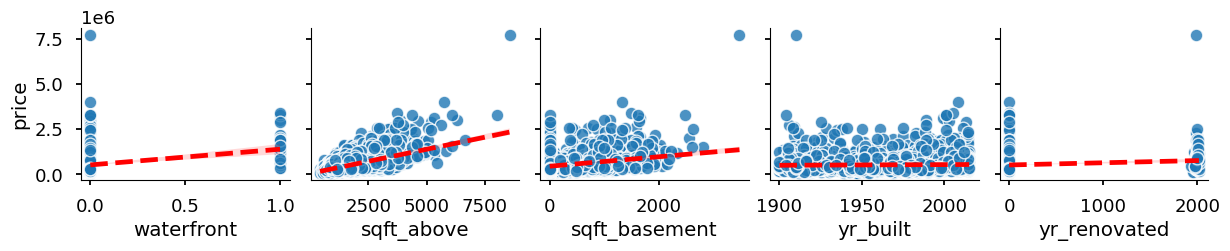

In [13]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[5:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

Looking at the regression plots above, sqft_lot does not seem to have a linear relationship to our target, nor does yr_built.
We will drop them both from the dataset.

In [14]:
## dropping nonlinear features
df = df.drop(columns=['sqft_lot','yr_built'])

We can move forward having met the assumption of linearity.


## 2. Checking for the Assumption of Little-to-No Multicollinearity

We can use correlation to identify pairs of features that are too multicollinear to include in the model.
We want to identify any pairs of features that have a correlation value of less than -0.8 or greater than +0.8.
To simplify this, we can take the absolute value of our correlation matrix. Now, we are simply looking for values that are greater than 0.8.

In [15]:
## Calc abs values of correlations
corr = df.drop(columns='price').corr().abs()
corr

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/3506136149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_renovated
bedrooms,1.000000,0.524277,0.586211,0.166878,0.031626,0.480919,0.320743,0.012836
bathrooms,0.524277,1.000000,0.759592,0.498945,0.039355,0.683858,0.304893,0.072898
sqft_living,0.586211,0.759592,1.000000,0.353335,0.064463,0.872318,0.452423,0.073901
floors,0.166878,0.498945,0.353335,1.000000,0.045178,0.527789,0.240627,0.012114
waterfront,0.031626,0.039355,0.064463,0.045178,1.000000,0.053953,0.033323,0.069174
sqft_above,0.480919,0.683858,0.872318,0.527789,0.053953,1.000000,0.041381,0.040899
sqft_basement,0.320743,0.304893,0.452423,0.240627,0.033323,0.041381,1.000000,0.076417
yr_renovated,0.012836,0.072898,0.073901,0.012114,0.069174,0.040899,0.076417,1.000000


We can convert this correlation matrix into a correlation heatmap visual to make it easier to analyze using sns.heatmap.

Notes on Heatmap Options:

We will want to make sure we annotate the correlation values, so we will add "annot=True".
We have an even number of columns and rows so we will add "square=True"
Now that we have the absolute values, we will want to use a colormap that does not diverge in 2 directions.
Good choices are "Blues", "Reds", "Greens", etc.

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/1789853896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


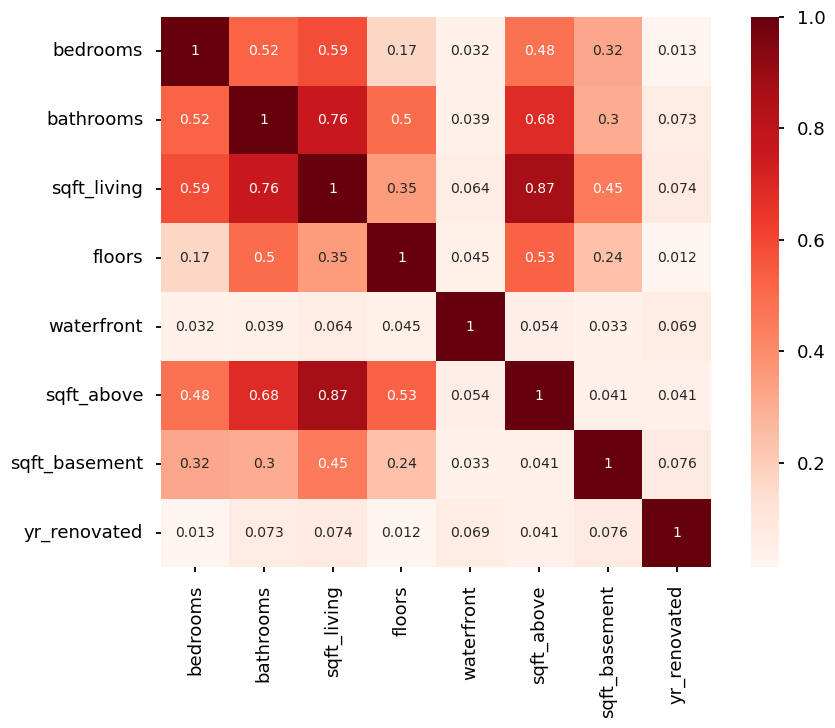

In [16]:
corr = df.drop(columns='price').corr().abs()
sns.heatmap(corr,square=True, cmap='Reds', annot=True);

Advanced Tip:
This is still kind of a lot of visual information to shift through. In reality, the cells that are in the upper-right corner of the matrix are just a mirror image of the lower-left corner of the matrix.
To remove the redundant information, we can add a mask to hide values that are in the upper-right triangle of our matrix.

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/940383258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


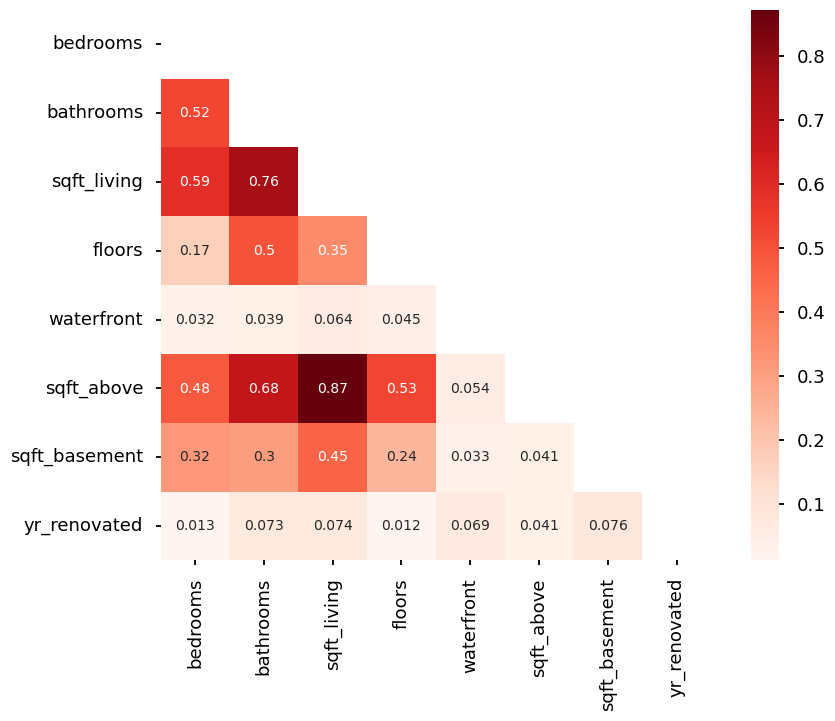

In [17]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

That's much cleaner and easier to look at!

Note: it is normal to have 1 empty row and 1 empty column on the top and right sides of the heatmap.

These were the rows where a feature was compared against itself.
e.g. bedrooms vs bedrooms.
We have removed all comparisons of a feature against itself with our mask.

### Identifying Correlated Features to Drop

Looking at the correlation heatmap above, we can identify one correlation that is greater than 0.8. sqft_above vs sqft_living.

We want to identify which feature of the pair to drop.

If one feature has multicollinearity with additional features, that is usually the best one to drop.
In this case, neither feature has multicollinearity with another feature
If we add back price to our correlation heatmap, we can see which of the 2 features has a stronger correlation to our target.

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/2046423489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


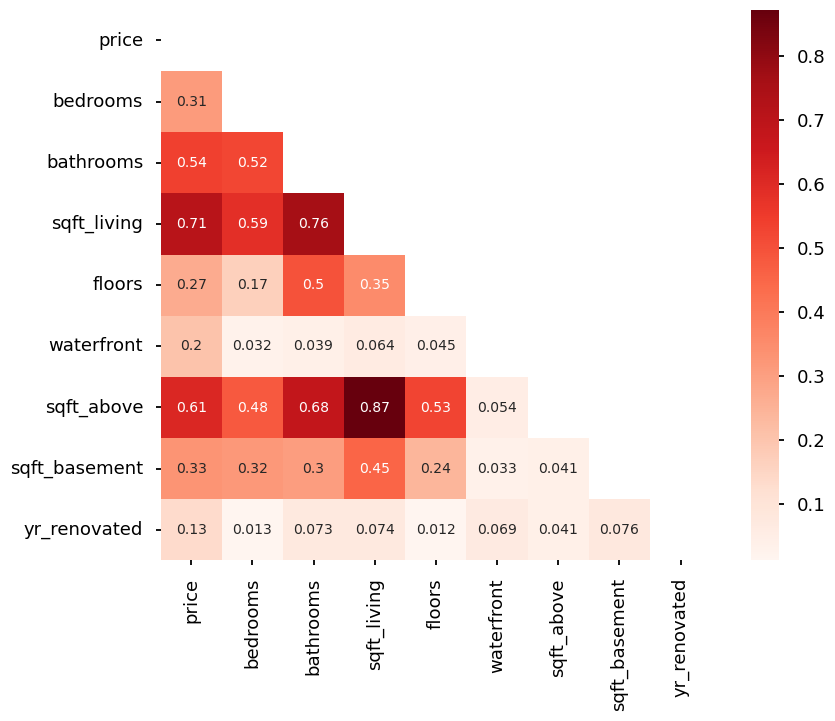

In [18]:
## Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

We can see price in the first column. sqft_living has a higher correlation with our target (0.71 vs 0.61), so we will keep sqft_living and drop sqft_above.

In [19]:
## Dropping the column showing high corelation
df = df.drop(columns=['sqft_above'])

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_21479/1069972364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


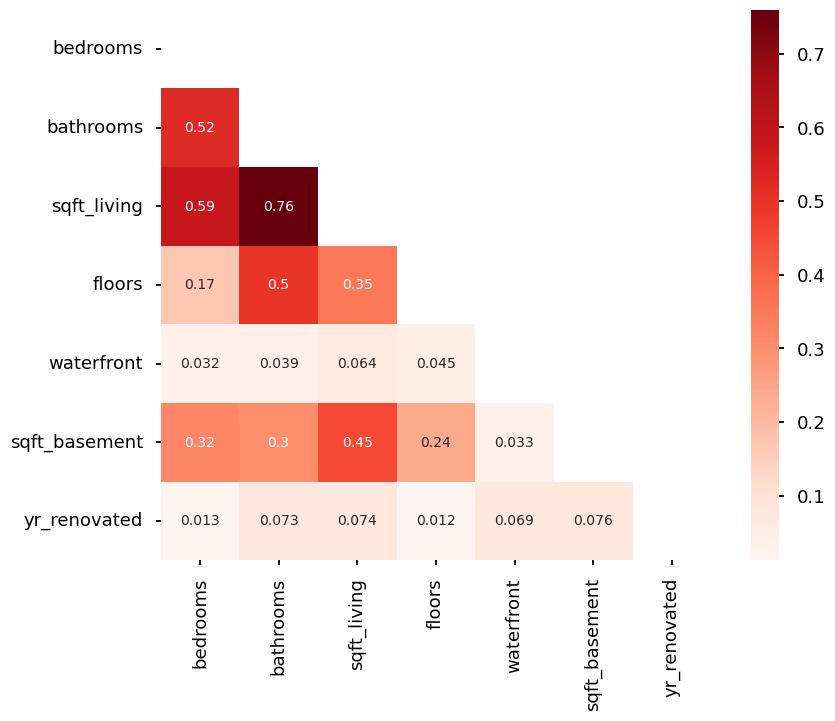

In [20]:
## final check for multicollinearity via correlation
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

Ok, that is much better! We have no remaining correlations above 0.8.


## Summary
Now that we have checked the first two assumptions, we will pro-process our data for statsmodels and run the linear regression.  Go on to part B!

## B. Running the Model
### Lesson Objectives:
By the end of this lesson, students will be able to:

Pre-process and run a linear regression model

### Preprocess for Modeling


In [22]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,zipcode
1344,3,1.75,1850,1.0,0,0,0,98045
1282,3,2.25,1870,1.0,0,430,0,98011
681,3,1.75,1750,1.5,0,520,0,98117
3851,3,1.00,1170,1.0,0,0,0,98125
3564,2,1.50,901,3.0,0,0,0,98115


In [23]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['zipcode']

In [24]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)

## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'floors', 'waterfront', 'sqft_basement',
                                  'yr_renovated']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['zipcode'])])

In [25]:
## fit the col transformer to learn feature names 
preprocessor.fit(X_train)

## Now create list of our final features after preprocessing
final_features = []

## adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)

## Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)

## Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2041,3.0,2.50,1520.0,1.0,0.0,440.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,3.0,2.25,1490.0,2.0,0.0,450.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4675,4.0,2.00,2060.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4629,3.0,2.50,2130.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4615,3.0,2.50,1980.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
## Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False)
X_train_df.head(2)

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,yr_renovated,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
1344,3.0,1.75,1850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1282,3.0,2.25,1870.0,1.0,0.0,430.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     170.6
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:47:06   Log-Likelihood:                -50424.
No. Observations:                3750   AIC:                         1.010e+05
Df Residuals:                    3673   BIC:                         1.015e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.194e+04   3959.240    -10.592

### Summary:
This lesson prepared our data for statsmodels and then ran a linear regression.  Now that we have our OLS model, we can assess the final 2 assumptions about the residuals: normality and homoscedasticity.  We will continue to test the assumptions of our residuals in the next lesson.

## C. Checking the residuals
### Objectives:
By the end of this lesson, students will be able to

Find the residuals from an OLS models
Check for normality in residuals with a Q-Q plot
Check for homoscedasticity of residuals

### Finding the Model Residuals
Statsmodels actually stores the residuals inside the model results under the "resid" attribute.
If we are using a scikit-learn linear regression, we can calculate them manually by subtracting our model's predictions from the actual target

In [28]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()

1344    -20242.467225
1282      1016.673278
681     -51423.211967
3851    103498.661493
3564    116338.934543
dtype: float64

## 3. Checking the Assumption of Normality with Q-Q Plots
While you have learned how to test for normality using scipy's normaltest, this is not an ideal approach to take for evaluating our residuals.

The tests can be overly strict about what is considered normal, so using a specific visualization designed to show deviations from normality is preferred.

A better tool to use is a diagnostic plot that will compare our residuals distribution to a perfectly normal distribution. This visualization will plot the quantiles of our residuals vs a normal distribution.

Statsmodels has a very nice qqplot function in sm.graphics.qqplot.
To use it, we provide:
the residuals
line="45" to add a red line to aide interpretation.
fit=True to automatically calculate the mean and standard deviation of the residuals.

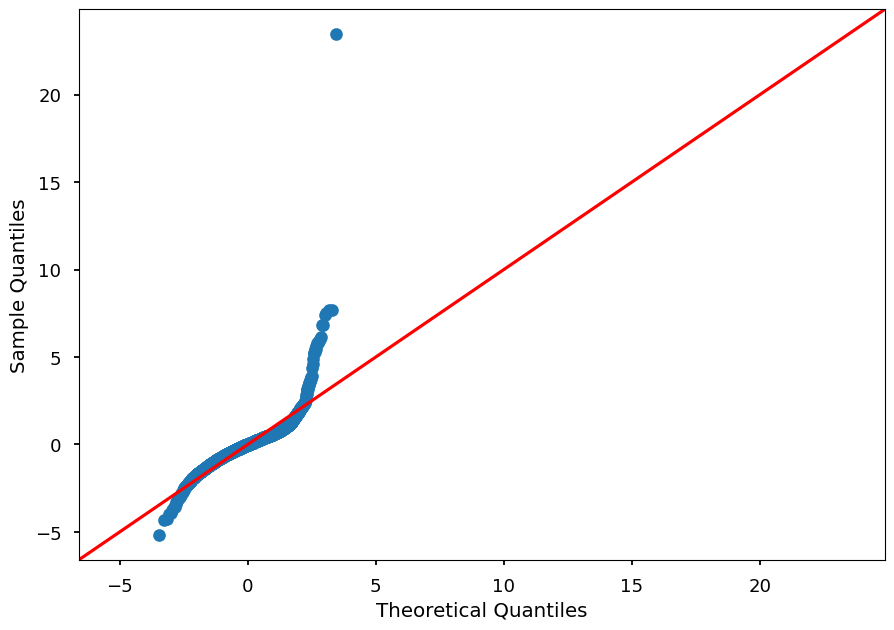

In [29]:
sm.graphics.qqplot(resid,line='45',fit=True);


### Interpreting a Q-Q Plot
On the qqplot above: the distribution of our residuals is plotted on the y-axis and a perfect normal distribution is plotting on the x-axis.

If we had a perfect normal distribution, our residuals would be equal to the theoretical values.
the red diagonal line shows the values we would expect if our residuals were normal.
The further the markers deviate from the red line, the more we are violating the assumption of normality.

### Interpreting Our Current Q-Q Plot
Looking at our Q-Q Plot above, we can see that we are clearly violating the assumption of normality.
The left tail of our distribution deviates a little from the line, but would be an acceptable amount of deviation.

The right tail, however, clearly has at least 1 very large residual.

We will also check for the second assumption about residuals - homoscedasticity - before we try to fix our model and better meet the assumptions.

## 4. Checking Assumption of Homoscedasticity


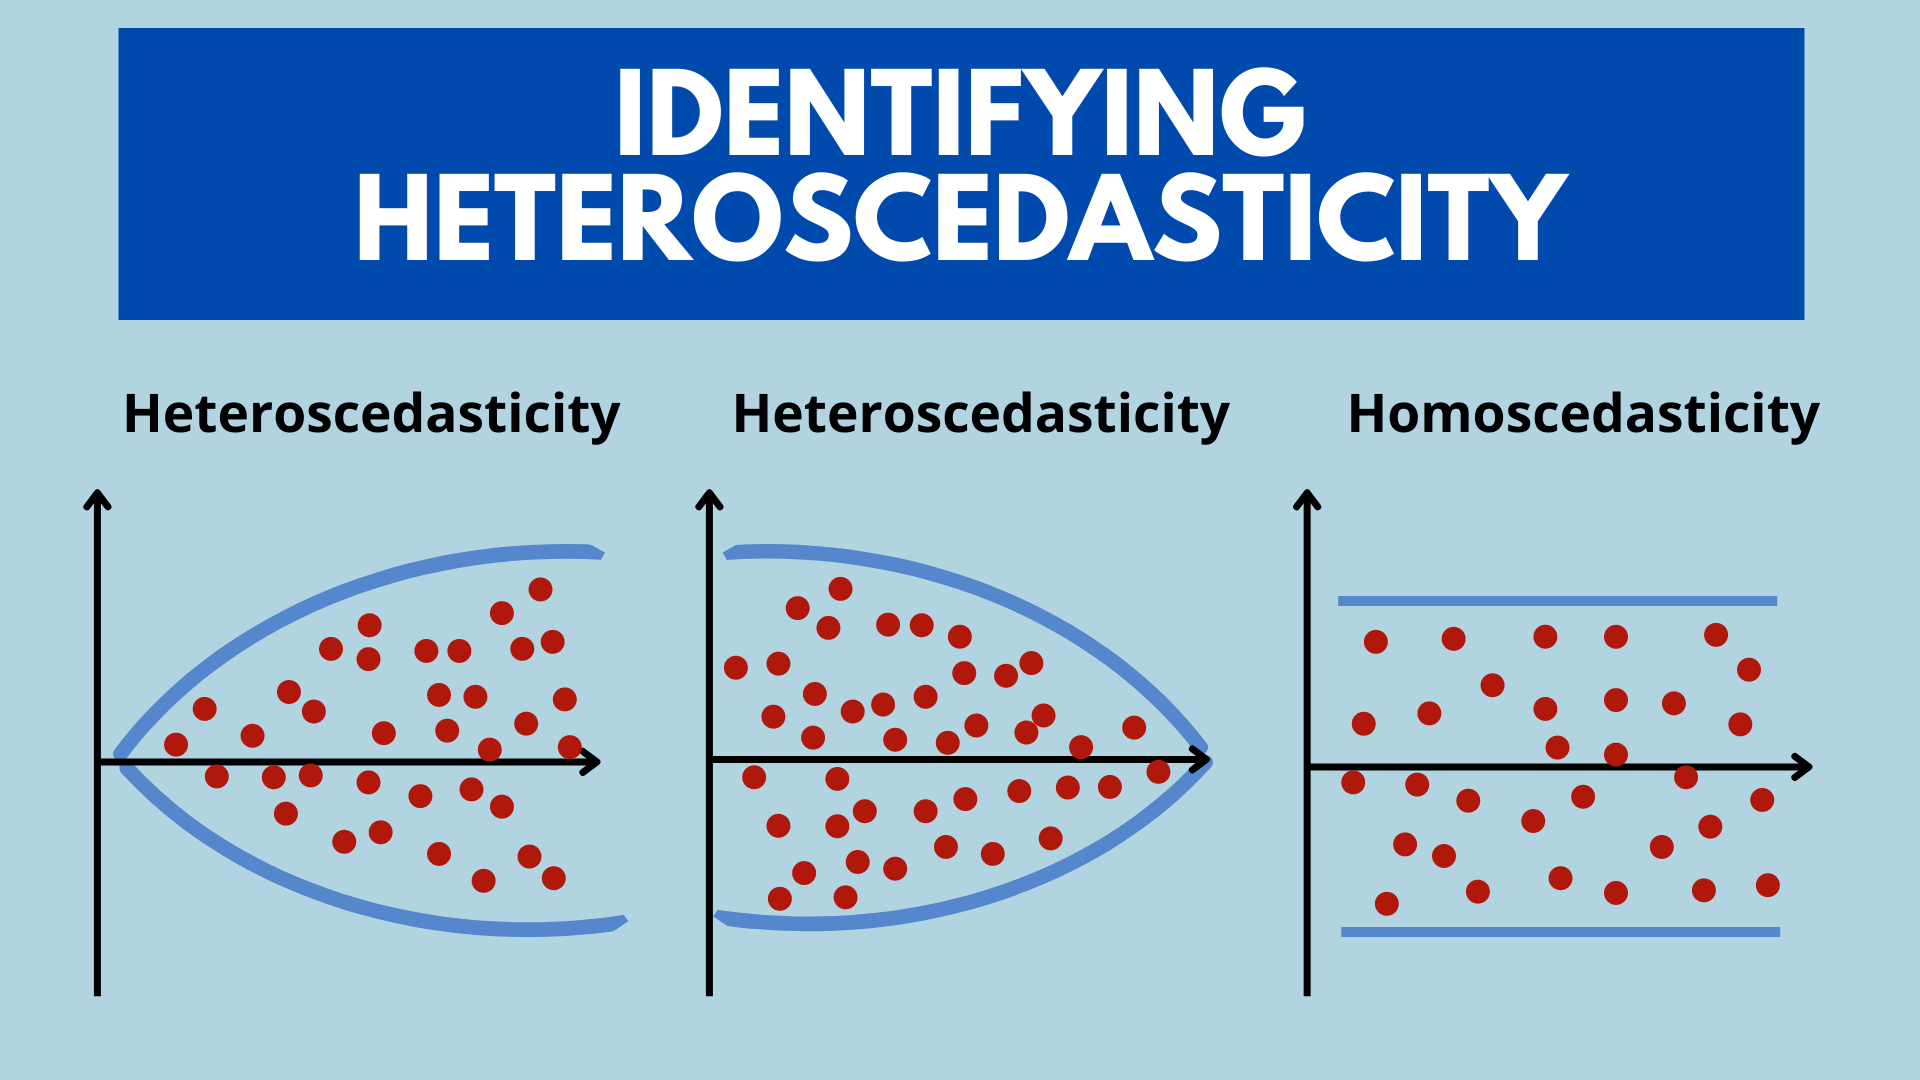

### Visualizing Homoscedasticity
We want to visualize the variance of our residuals across the range of values it predicted.

We will create a scatterplot with the predictions on the X-axis and the the model's residuals on the y-axis.
We will call this a "residual plot"
With the residual plot, we are looking for approximately equal variance across the full range of predictions.

In other words, we are looking for a pattern to the spread of the residuals as we move from left to right along the X-axis.

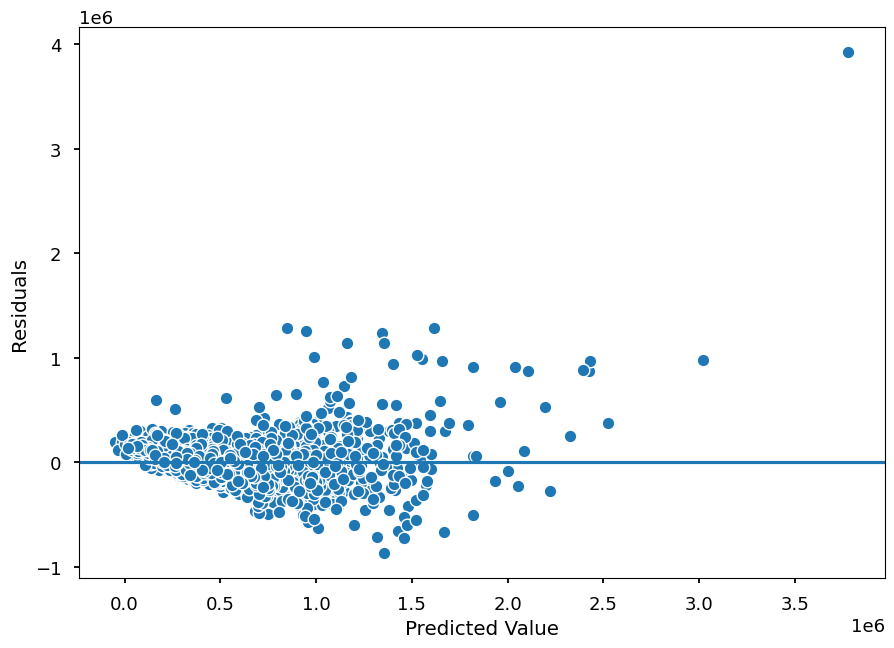

In [31]:
## Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train -  y_pred
## Plot predicitons vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred,resid,ec='white',lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals',xlabel='Predicted Value');

### Interpreting a Residual Plot
If we are meeting the assumption of homoscedasticity, we should see no clear pattern to the residuals. They should be approximately equally spread out.
Its okay if there is some variability at various points along the X-axis.
What we really DON'T want to see is a clear cone-shape to the residuals.
### Interpreting Our Residual Plot
Looking at our residual plot above, we can clearly see a cone-shape, with tightly clustered residuals on the left that continue to spread out as we move towards the right.

In addition, we have one extreme value on the right tail of our distribution.
Before we address these violations, let's first combine both the Q-Q Plot and residual plot into a function that we can easily reuse with each new iteration of our model.

## Writing a Function to Evaluate OLS Regression Residuals

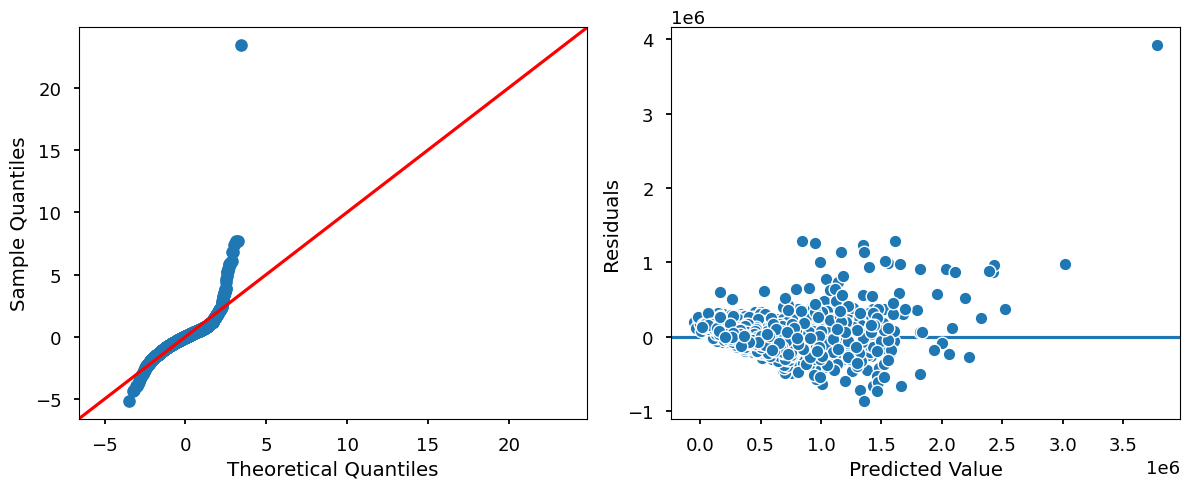

In [32]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

### Summary
This lesson showed how to check your residuals for normality and homoscedasticity.  We did notice a few issues.  In the next lesson,  we will explore how to diagnose the problems and improve our model.  

## D. Diagnosing the Model
Make sure you have done the previous parts of this lesson. We will pick up where we left off!

### Lesson Objectives:
After this lesson, students will be able to:

Diagnose problems with a model
Improve the model
Evaluate the model on the test data
Save a model for future use with joblib
Now that we can get our model summary and evaluation visuals, let's interpret what we are seeing and decide how we might fix it.

These were the Q-Q plots created in the last lesson:

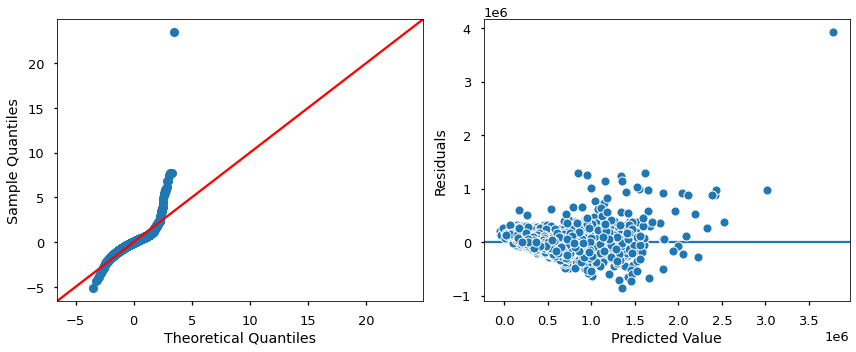

We clearly have issues with our residuals. It looks like there is at least 1 extreme value on the high-end of our distribution that is driving the problem.
Let's look for and remove outliers from our target and see if we can then create a better model.

## Iterating on the Model
### Removing Outliers
As a reminder, we can convert our data to z-scores with StandardScaler() and can consider any z-score that is below -3 or above +3 to be an outlier that we can remove.
HOWEVER, we will want to keep track of which outliers we have removed so we may be transparent about what types of homes our model was built to predict.
We will simplify this by taking the absolute value of the z-scores and then checking for values >3

Note: standard scaler expects 2D data and we will receive an error message indicating that.
The error message tells us to reshape our variable with (-1,1) if we have a single feature - which we do - our target!

In [33]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

array([[-0.40517352],
       [-0.30686833],
       [-0.02613678],
       ...,
       [-0.76749839],
       [-0.91214746],
       [-0.46977408]])

Since we will need to use the indices of our outliers to remove them across the X and y variables, we want to convert our scaled data back to a pd.Series with the same index that it had originally.
To convert it back into a series we will need to flatten the array back to a 1D array with .flatten()

In [34]:
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

1344   -0.405174
1282   -0.306868
681    -0.026137
3851   -0.334956
3564   -0.278781
          ...   
168     1.982238
1425    0.156570
3784   -0.767498
2847   -0.912147
4220   -0.469774
Length: 3750, dtype: float64

In [35]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

1344    False
1282    False
681     False
3851    False
3564    False
        ...  
168     False
1425    False
3784    False
2847    False
4220    False
Length: 3750, dtype: bool

Now that have our True/False index where True indicates an outlier, we can visualize how many values we would be removing.



In [36]:
## How many outliers did we find?
idx_outliers.sum()

63

In [37]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

### What values of price were removed from our analysis?
We will want to know when presenting our results to the stakeholder.

In [38]:
print(f"Our model includes homes priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes homes priced:
- Greater than $82,000.00
- Less than $1,600,000.00


Our model includes homes priced:

- Greater than $82,000.00 

- Less than $1,600,000.00

### Use the same criterion to remove outliers from the test data

In [39]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )

# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3

# how many outleirs in test data?
idx_outliers_test.sum()

24

We can see we have 24 outliers to remove from our test data



In [40]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

### Fit and Diagnose a New Model with Outliers Removed



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:09:52   Log-Likelihood:                -48210.
No. Observations:                3687   AIC:                         9.657e+04
Df Residuals:                    3610   BIC:                         9.705e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.972e+04   2814.752     -7.007

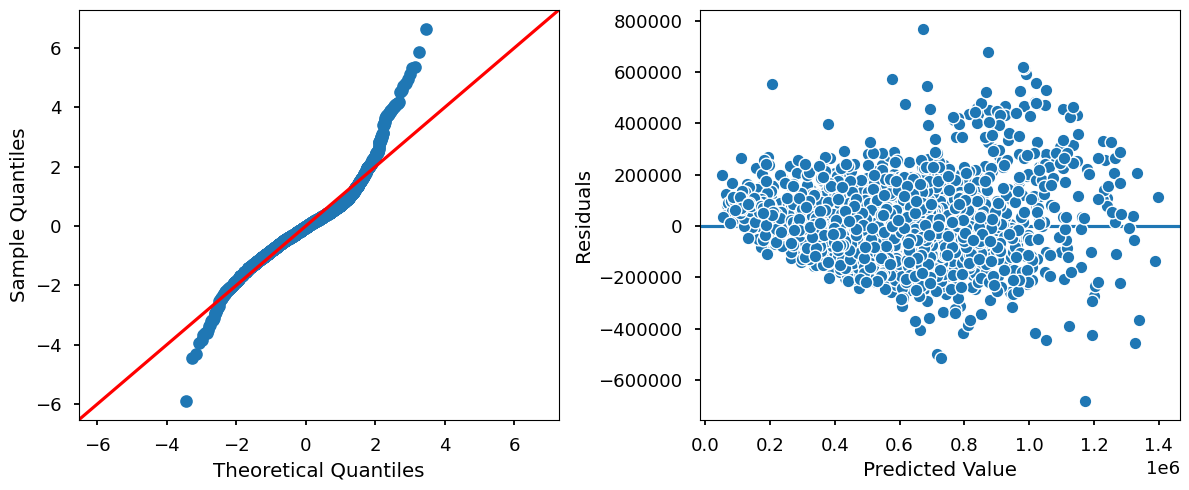

In [41]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

That looks MUCH better!!!!

Looking at our Q-Q Plot:
Yes, we still have some deviation from the red line at the ends of our tails, but this is acceptable deviation if our goal is to extract insights from our model's coefficients, which we do in the next lesson.
Looking at the Residual Plot
We no not have a clear cone pattern to our residuals, which is great!
Yes, our residuals look a little circular, but this is acceptable compared to what we had previously.

## Final Diagnostic Step: Remove Columns with Insignificant P-Values
Our final check for our OLS model is to check the p-values for each coefficient (the |P|>t column) and remove any features that had insignificant p-values.

This can be much easier to sift through if we actually pull out the pvalues from our OLS results.

The coefficients are stored in the results variable under the .pvalues attribute:

In [43]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

zipcode_98024    0.186877
zipcode_98027    0.336972
zipcode_98034    0.126808
zipcode_98053    0.141641
zipcode_98074    0.161004
zipcode_98077    0.263280
zipcode_98118    0.103993
zipcode_98125    0.324225
zipcode_98126    0.527918
dtype: float64

We can see that only some of the zipcode columns had insignificant p-values. So what do we do now?
Can we drop some zipcodes and keep others?

NO!!! Excluding One-Hot-Encoded features is an all-or-none decision.
The guideline is if the majority of the coefficients for the encoded feature are insignificant, then drop ALL of the zipcode columns.
As long as the majority of zipcodes have significant p-values, it is ok to leave in the others that do not.

In [44]:
## so how many zipcode columns do we have overall? 
# use a list comprehension to filter out column that start with zipcode
zipcode_cols = [col for col in X_train_df.columns if col.startswith('zipcode')]
## preview first few zipcode cols to confirm
zipcode_cols[:3]

['zipcode_98001', 'zipcode_98002', 'zipcode_98003']

In [45]:
len(zipcode_cols)


70

In [46]:
## So how many zipcode coeffs are insig?
len(p_vals[p_vals>.05])

9

Since we only had 9 insignificant p-values out of 70, we can go ahead and keep zipcode features in the model.

## Evaluating the Model on the Testing Data
Now, all that remains is to evaluate the model on the test data.

Since we cannot get a model summary for the test data, we will calculate our R-squared using sklearn's r2_score function.
We will then visualize the residuals for the test data using our function.

R-Squared for Test Data: 0.78


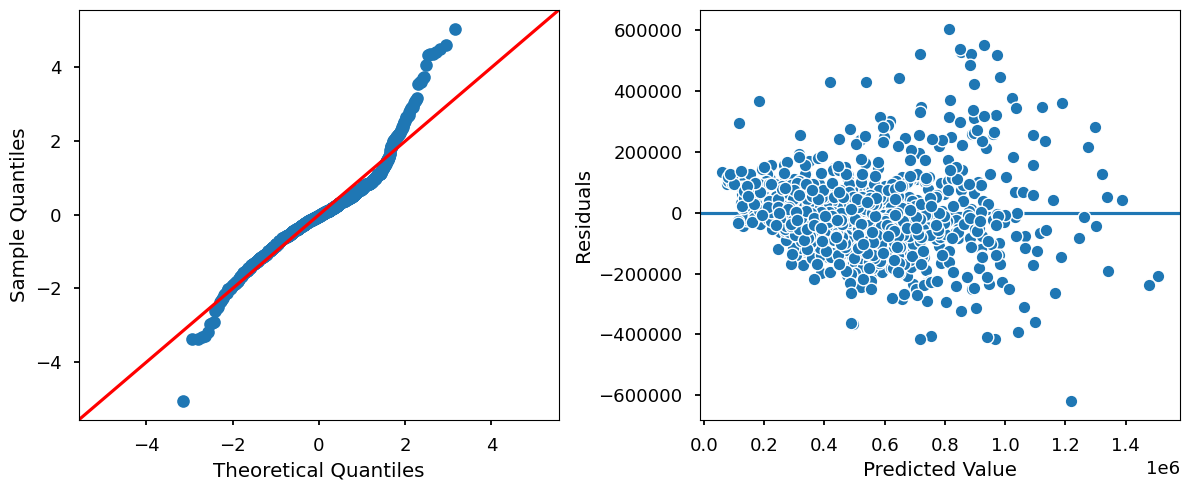

In [47]:
## evaluate test
r2_test = r2_score(y_test_cln, result.predict(X_test_cln))
print(f"R-Squared for Test Data: {r2_test:.2f}")
evaluate_ols(result,X_test_cln, y_test_cln)

Excellent! We have a very similar R-squared on the test data, so our model is not overfit.
Our residuals look the same for the test data as the training data - no major issues that need to be addressed.

# Saving Our Model for Later
We will continue to explore the results from this model in the next lesson.

We will create a dictionary of variables we want to export to use in a subsequent notebook/analysis. It will include

The joblib package has become increasing popular, and Scikit-learn now promotes joblib files as the best way to save models. (An alternative is pickle which is why you may come across the term "pickling")

Here is the section of the User Guide on "Serializing models" where they demonstrate using joblib.
To make it easy to remember which variable was which, we will save the data and model into a dictionary first.

We will save our:
Outlier removed training and test data
Our preprocessing column transformer
The scaler we used to transform price when looking for outliers
Our OLS results that contain the .summary()
Then we will save the dictionary to a joblib file.

In [48]:
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_cln,
         'y_train':y_train_cln,
         'X_test':X_test_cln,
         'y_test':y_test_cln,
          'Outlier Scaler':scaler,
          'Column Transformer':preprocessor,
         'OLS Results': result}

In [49]:
import joblib
joblib.dump(export, 'ols_results.joblib')

['ols_results.joblib']

## Loading a Joblib


In [50]:
import joblib
loaded_data = joblib.load('ols_results.joblib')
loaded_data.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'Outlier Scaler', 'Column Transformer', 'OLS Results'])

## Summary
In this lesson, you were able to improve upon the original linear regression model. You removed outliers, but were careful to note that your findings will be limited to the range of prices that you used in your model.  We concluded this lesson be evaluating the model on the test data and showing a convenient way to save your model for later using joblib.